# P2: Project Results (Sigma Squad)

* [1. Analysis of the Final Merged Dataset](#1-analysis-of-the-final-merged-data-set)
* [2. Movie Success Index](#2-movie-success-index)
* [3. Actor Success Index](#3-actor-success-index)

## 1/ Analysis of the Final Merged Dataset:

After loading and merging our 3 datasets, we obtained the final raw dataset (`final_merged_data.csv`). It's composition can be seen below.

In [16]:
from src.data.transform_data import* 
from src.models.movie_success_model import* 
from src.utils.plot_graphs import*

raw_df = raw_data()
raw_df.to_csv('data/final_merged_data.csv', index=False)
raw_df.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Review score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner
0,/m/03vyhn,ghosts_of_mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN
1,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/m/0crgdbh,brun_bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/0285_cd,white_of_the_eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Thriller, Erotic thriller, Psychological thriller",6.2,2200.0,Donald Cammell,David Keith,NaN,NaN,Mrs. White's Productions,NaN,NaN
4,/m/01mrr1,a_woman_in_flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to proceed with our analysis, we need to deal with the NaN values.  

### The bar plot below shows how many movies have valid values in categories, that are important for our further computations.

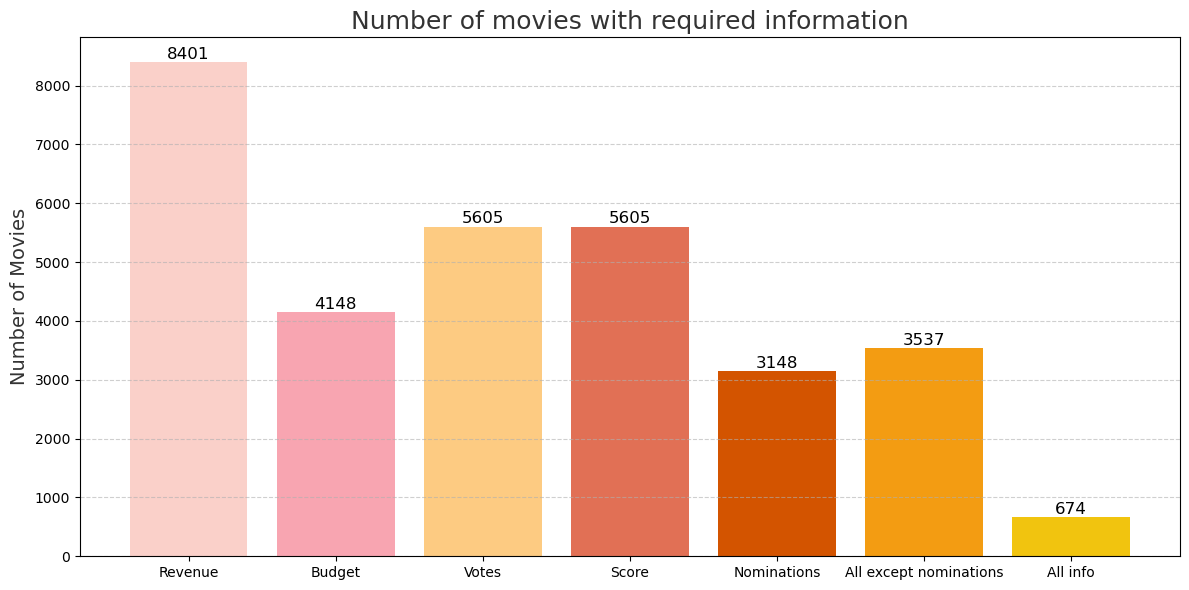

In [17]:
bar_plot_available_data(raw_df)

To establish the movie success index, we are focused on specific criteria such as budget, revenues, ratings, number of Oscar nominations, and the movie profitability. Our goal is to assess whether we have enough reliable data to effectively study these factors.  

We analyzed the available data and observed that the original CMU Movie dataset contains 8 401 movies with revenue data. From the additional datasets, we identified movies that meet other key criteria, including budget (4 148 movies) and review score (5 605 movies).  

### Finally, we have 3 537 movies that have all required information combined. 

In [18]:
df = clean_data(raw_df)
print(f'The length of the working dataset of movies that have all required informations is {len(df)}.')

The length of the working dataset of movies that have all required informations is 3537.


Given this sample size, we are confident that we have sufficient and reliable data to move forward with constructing the success index. The next step will be to normalize and properly weight each criterion to build the success index.

## 2/ Movie Success Index:

To create our success index, we evaluated movie success based on four key factors: **profitability**, **revenue**, **reviews**, and **Oscar nominations**. Both profitability and revenue were scaled using min-max normalization, providing a consistent framework to evaluate and compare success across variables with different ranges. 

After calculating the factors, we combined them into a final index. Profitability, revenue, and review factors are weighted (35%, 35%, and 30%, respectively) and adjusted by the Oscar factor. The resulting index is normalized again to a 0-10 scale, offering a single score representing each movie’s overall success.

Here is a more detailed explanation of the setup of each factor. Note that all functions used can be found in the `src/movie_success_model.py` file.

- **Profitability factor:** this factor measures how much revenue a movie generates relative to its budget. First, the profitability ratio (revenue divided by budget) is calculated. To reduce the impact of outliers, a logarithmic transformation (log) is applied, which compresses large values and accentuates smaller ones. The result is normalized to a 0-10 scale, making comparisons across movies straightforward.

- **Revenue factor:** this factor focuses solely on the movie's box office revenue. A log10 transformation is applied to balance the range of high and low revenues, particularly since box office numbers can vary greatly. After applying the transformation, scores are scaled from 0 to 10 for consistency.

- **Review factor:** this factor is directly taking the ImdB movie ratings which were already on a scale from 0 to 10.

- **Oscar multiplication factor:** this factor amplifies the success index based on Oscar nominations, recognizing industry recognition as a mark of success. The function uses a logarithmic transformation for diminishing returns, giving a smaller increase for each additional nomination, then scales by a multiplier to ensure consistent weighting.

### Below you can find histograms for each factor, showing the final distribution after applying our adjustments.

In [22]:
movie_success_index(df)
from src.utils.plot_graphs import hist_std_config_ax

fig, axes = plt.subplots(1, 3, figsize=(30, 6))  
hist_std_config_ax(df, 'Profitability score', axes[0])
hist_std_config_ax(df, 'Revenue score', axes[1])
hist_std_config_ax(df, 'Review score', axes[2])

plt.tight_layout()
plt.show()

ImportError: cannot import name 'hist_std_config_ax' from 'src.utils.plot_graphs' (/Users/aiden/Desktop/EPFL/Master/M - ADA/ada-2024-project-sigma-squad/src/utils/plot_graphs.py)

### Oscar nomination distribution across movies.

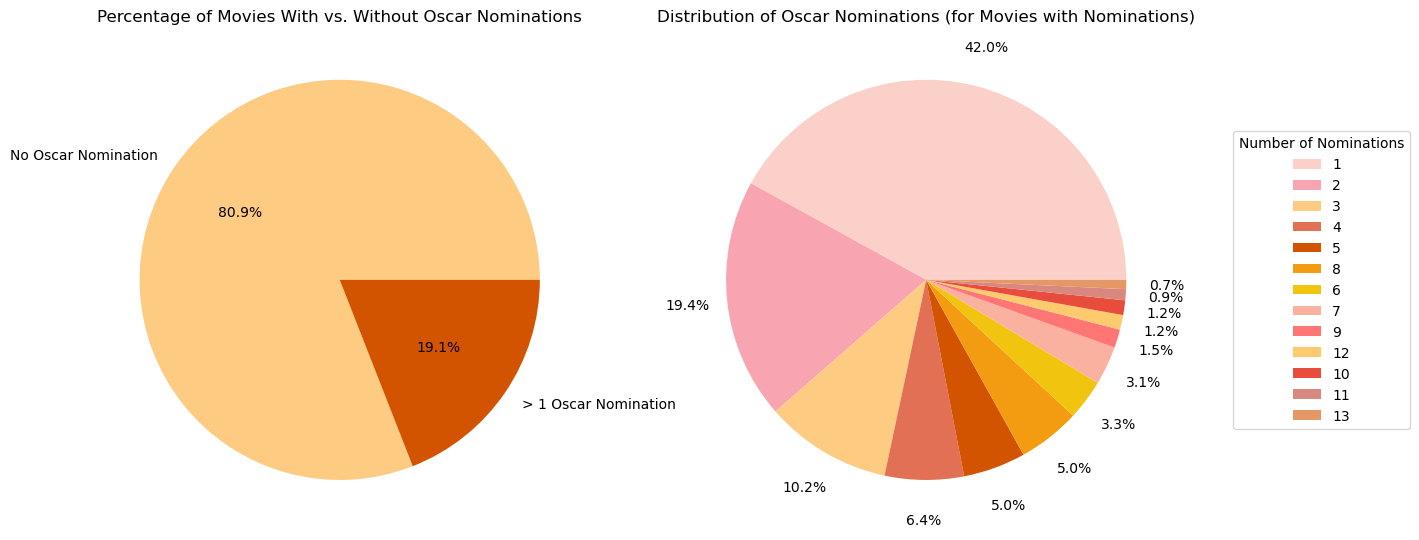

In [5]:
oscar_pie_chart(df)

On the left pie, we can see that only 19.1% of our analyzed movies have any Oscar nomination. Thus, we decided to create a multiplication factor, that will be multiplied with the final movie success index. Movies that have Oscar nominations will benefit from that multiplication factor, but the other movies won't be penalized. Moreover, the more nominations, the higher the multiplication factor.

### ***Example of ranking based on our movie success index :*** top 5 best and worst movies

In [6]:
top5_best(df)

,Movie name,Movie release date,Movie Success Index,Review score,Revenue score,Profitability score
80920,the_lord_of_the_rings:_the_return_of_the_king,2003,7.916470,8.9,9.257307,5.999965
79973,the_lord_of_the_rings:_the_fellowship_of_the_ring,2001,7.850975,8.8,9.052642,5.835857
65287,forrest_gump,1994,7.844366,8.8,8.846968,6.022649
57552,e.t._the_extra-terrestrial,1982,7.818620,7.8,8.975484,7.262251
23702,avatar,2009,7.734081,7.8,10.000000,5.989874


In [7]:
top5_worst(df)

,Movie name,Movie release date,Movie Success Index,Review score,Revenue score,Profitability score
8416,deadfall,1993,1.034197,4.0,0.264990,0.000000
19093,dangerous_game,1993,1.524680,5.6,0.471943,0.173344
10467,wicked_stepmother,1989,1.735934,4.3,0.973217,1.540833
76763,the_specials,2000,1.770565,5.8,0.000000,1.352018
58128,best_laid_plans,1999,1.780705,6.1,0.603631,0.527457


## 3/ Actor Success Index:

### Idea of the index

Now that we have established our movie success index we can move on to creating an actor success index. The goal is to be able to quantitatively compare the success of an actor and their career given the success of their movies. The main challenge here is finding a meaningful way to do so. To illustrate, our initial attempts at building the index relied on a mean of scores over an actors career. However, with this method, the most successful actors where side characters that starred in only one or two movies, but that happened to be huge successes. The index therefore needs to account not only for the absolute success of the movies but also for the amount of quality movies and the consistency of success.

### Main character bonus

The first thing we do when establishing the score is identifying main characters. Being chosen for the most prominent role of a movie is a certificate of trust from the production company. This is why we boost the movie score in which an actor is the star by 25% before processing it further. This is a way to account for desirability in the movie industry.

### Multiplier & Streak

To build the actor score, we have come up with a multiplier and streak system. For every actor, the movies are sorted by release date in ascending order. From the score of every movie, a multiplier is generated. If the score is within 25% of the last movie or better, the multiplier is generated proportionaly from the movie score (it is greater than 1, see code for the formula). If the score of the movie happens to be more than 25% worse than the last, the multiplier is generated proportionally to the percent difference between both successive movies (multiplier smaller than 1). This way, successive successful movies grow the cumulative multiplier, whilst inconsistencies and drops in quality decrease it. This systems values an actors ability to be consistent in the quality of their work. Moreover, repeatedly getting casted is an indicator for industry desirability. This means the system allows us to better capture the value an actor has had over their career.

### Final grade

 The product of all multipliers up to the current one (cumulative multiplier) is applied to the current movie score and the product is added to an array. This array therefore holds all movie scores of an actor, scalled by their respective cumulative multiplier. The array is then summed and a log10 is applied to the sum. The results are normalized using min-max normalization to obtain a comparable grade out of 10. 

In [8]:
actor_df = actor_data(df)